<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve, auc
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import gzip
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from itertools import cycle
from tabulate import tabulate

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/secondhanddataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [5]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [7]:
data.duplicated().sum()

0

<Axes: >

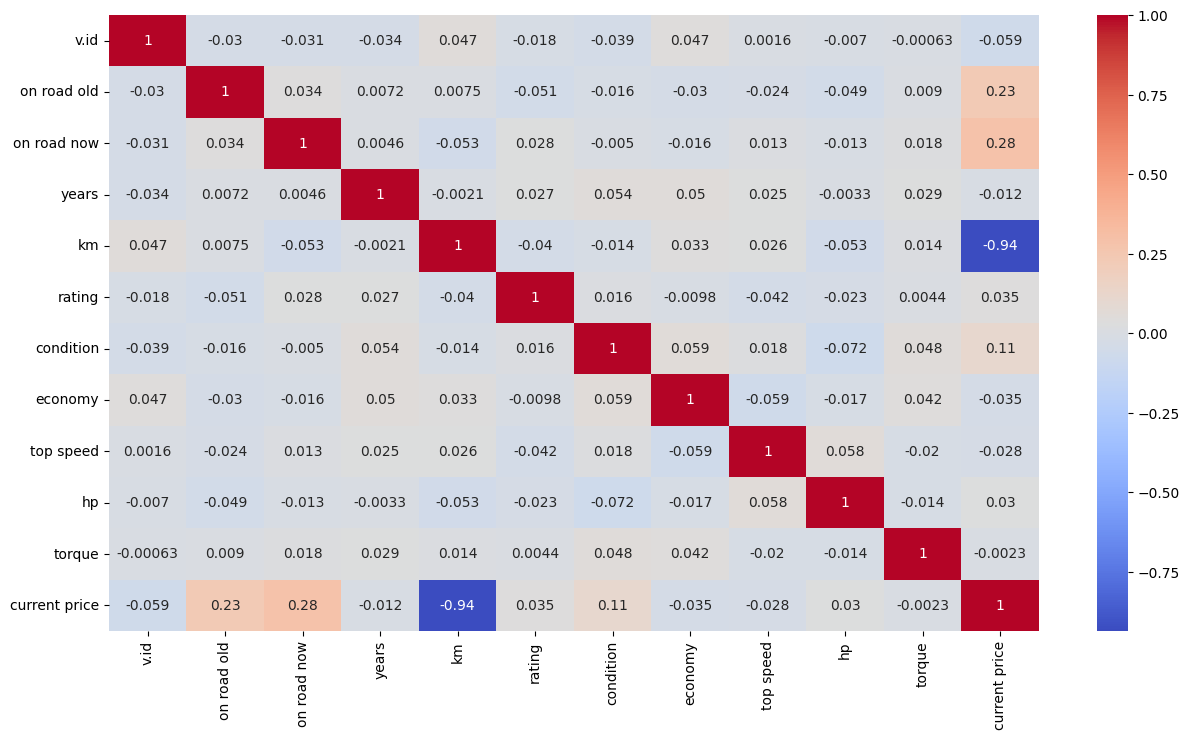

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: >

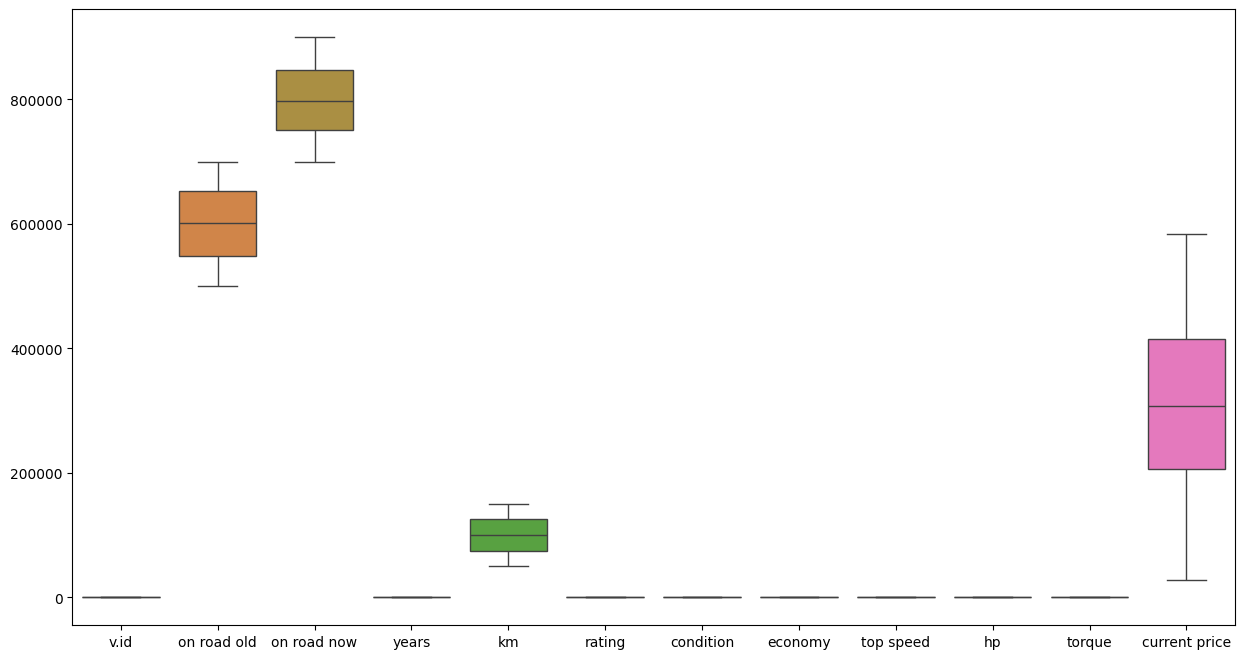

In [9]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)

In [10]:
y = data['current price']
X = data.drop('current price', axis=1)
y.min(), y.max()

(28226.5, 584267.5)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

# Tensorflow

In [14]:
X_train.shape

(800, 11)

In [15]:
inputs = tf.keras.Input(shape=(11, ))
hidden = tf.keras.layers.Dense(16, activation='relu')(inputs)
hidden = tf.keras.layers.Dense(8, activation='relu')(hidden)
hidden = tf.keras.layers.Dense(4, activation='relu')(hidden)
outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

tf_model = tf.keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Callback untuk mencetak log setiap 10 epochs
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: Loss={logs['loss']:.4f}, Val Loss={logs['val_loss']:.4f}")
    if (epoch + 1) % 10 == 0 else None
)

tf_model.compile(
    optimizer='adam',
    loss='mse'
)

history = tf_model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=64,
    epochs=300,
    verbose=0,
    callbacks=[early_stopping, print_callback]
)

Epoch 10: Loss=0.6267, Val Loss=0.7283
Epoch 20: Loss=0.1942, Val Loss=0.2374
Epoch 30: Loss=0.0588, Val Loss=0.0795
Epoch 40: Loss=0.0333, Val Loss=0.0486
Epoch 50: Loss=0.0226, Val Loss=0.0352
Epoch 60: Loss=0.0173, Val Loss=0.0268
Epoch 70: Loss=0.0143, Val Loss=0.0225
Epoch 80: Loss=0.0119, Val Loss=0.0189
Epoch 90: Loss=0.0101, Val Loss=0.0164
Epoch 100: Loss=0.0089, Val Loss=0.0146
Epoch 110: Loss=0.0078, Val Loss=0.0129
Epoch 120: Loss=0.0070, Val Loss=0.0118
Epoch 130: Loss=0.0064, Val Loss=0.0108
Epoch 140: Loss=0.0058, Val Loss=0.0101
Epoch 150: Loss=0.0054, Val Loss=0.0096
Epoch 160: Loss=0.0049, Val Loss=0.0084
Epoch 170: Loss=0.0045, Val Loss=0.0077
Epoch 180: Loss=0.0042, Val Loss=0.0073
Epoch 190: Loss=0.0039, Val Loss=0.0069
Epoch 200: Loss=0.0037, Val Loss=0.0068
Epoch 210: Loss=0.0035, Val Loss=0.0063


In [16]:
y_test = scaler.inverse_transform(y_test)

y_pred_tf_scaled = tf_model.predict(X_test)
y_pred_tf = scaler.inverse_transform(y_pred_tf_scaled)

tf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tf))
tf_r2 = r2_score(y_test, y_pred_tf)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [17]:
tf_rmse, tf_r2

(10729.614918399482, 0.9931518159611864)

In [18]:
y_test.min(), y_test.max()

(58384.0, 559074.0)

## Pytorch

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [27]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [28]:
class SimpleRegression(nn.Module):
  def __init__(self):
    super(SimpleRegression, self).__init__()
    self.layer1 = nn.Linear(11, 16)
    self.layer2 = nn.Linear(16, 8)
    self.layer3 = nn.Linear(8, 4)
    self.out = nn.Linear(4, 1)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    x = self.out(x)
    return x

regresi = SimpleRegression()

In [29]:
optimizer = optim.Adam(regresi.parameters(), lr=0.0005)
criterion = nn.MSELoss()

In [31]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

best_loss = float('inf')
patience = 5
counter = 0

for epoch in range(1, 600):
  regresi.train()
  total_loss=0
  for x, target in train_loader:
    optimizer.zero_grad()
    output = regresi(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  avg_loss = total_loss / len(train_loader)
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, loss: {avg_loss:.4f}')

  if avg_loss < best_loss:
    best_loss = avg_loss
    best_model = regresi.state_dict()
    counter = 0
  else:
    counter += 1
    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        regresi.load_state_dict(best_model)
        break


Epoch: 10, loss: 0.0004
Epoch: 20, loss: 0.0003
Early stopping at epoch 27


In [32]:
regresi.eval()
total_loss = 0

y_pred = []
y_actual = []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

with torch.no_grad():
  for x, target in test_loader:
    output = regresi(x)
    y_pred.extend(output.numpy().flatten())
    y_actual.extend(target.numpy().flatten())
    loss = criterion(output, target)
    total_loss += loss.item()

In [33]:
y_pred = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
y_actual = scaler.inverse_transform(np.array(y_actual).reshape(-1, 1))

torch_rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
torch_r2 = r2_score(y_actual, y_pred)

In [34]:
torch_rmse, torch_r2

(2967.6505859012445, 0.9994761347770691)

In [35]:
y_actual.min(), y_actual.max()

(58383.996, 559074.0)

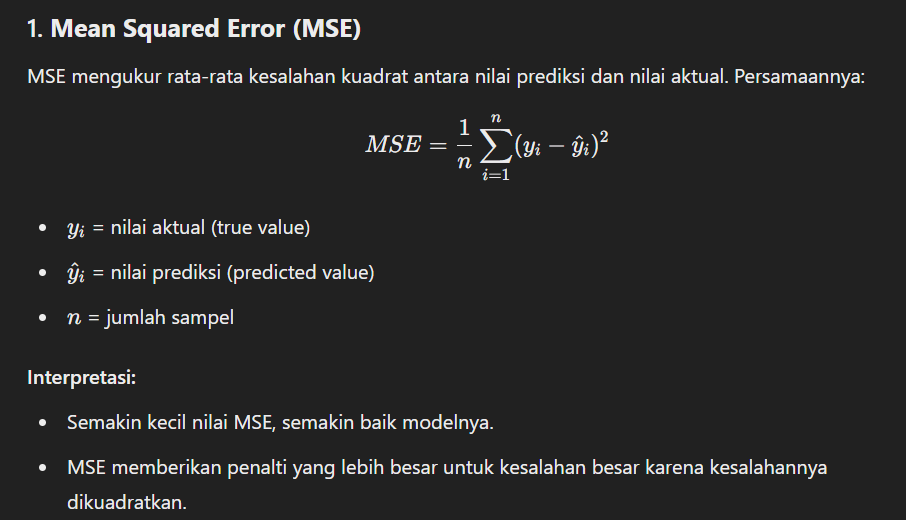

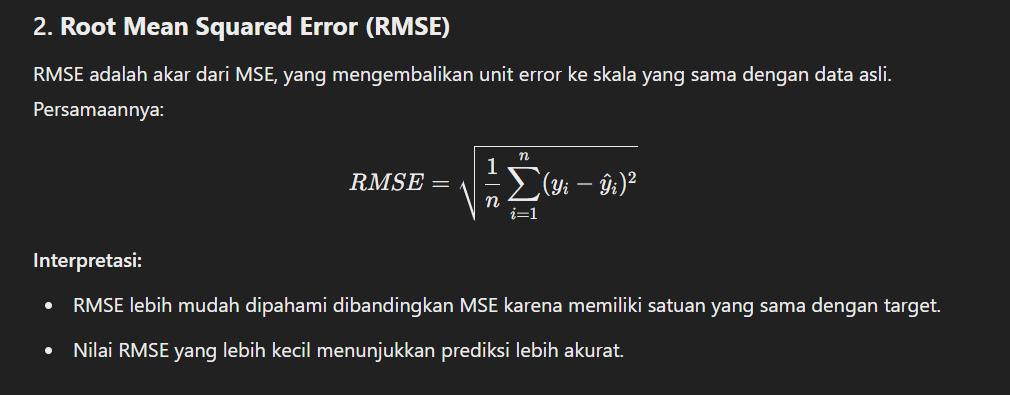

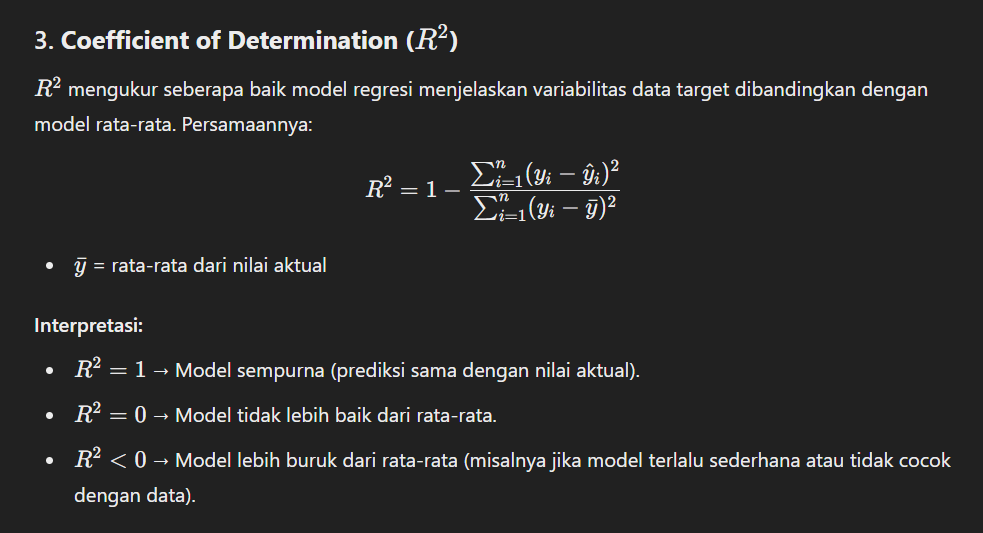

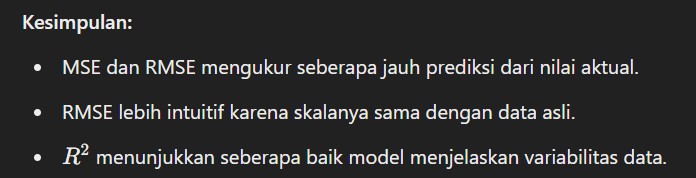